Assume that $$\text{d}m_t = \left(\mu \text{d}t + \sigma\text{d}W_t \right)m_t $$ in the efficient price simulation (instead of pure brownian motion only)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm



def get_liquidity_risk(tau, omega, psi, sigma, mu = 0, n_simulations = 1000):
    """
    This function simulates the liquidity risk n_simulations times for every timestep tau
    and average the results.
    """
    liquidity_risk_samples = []
    K = int(omega*tau)
    for sim in range(n_simulations):
        traders_arrival_times = 1/omega*np.arange(1,K+1)
        brownian_motions = np.cumsum(np.random.normal(0,psi/np.sqrt(omega),K))
        unobservable_price = np.exp((mu - psi**2/2)*traders_arrival_times + psi*brownian_motions)
        reservation_prices = unobservable_price + np.random.normal(0, sigma, K)
        clearing_price = np.mean(reservation_prices)
        liquidity_risk_sample = clearing_price*np.ones(K) - unobservable_price
        liquidity_risk_samples.append(liquidity_risk_sample)
    liquidity_risk_list = list(map(np.var, np.transpose(liquidity_risk_samples).tolist()))
    return np.mean(liquidity_risk_list)

# PARAMETERS
omega = 100
psi = 2
sigma = 1
tau_vals = np.linspace(0.00,2,1000)
liquidity_risks = []
for tau in tqdm.tqdm(tau_vals):
    liquidity_risk_tau = get_liquidity_risk(tau, omega, psi, sigma)
    liquidity_risks.append(liquidity_risk_tau)

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\Vincelot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Vincelot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 1000/1000 [02:14<00:00,  7.46it/s]


C:\Users\Vincelot\AppData\Local\Temp\ipykernel_24892\1017096314.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(tau_vals), np.log(liquidity_risks), c='r')


Text(0, 0.5, 'Liquidity Risk')

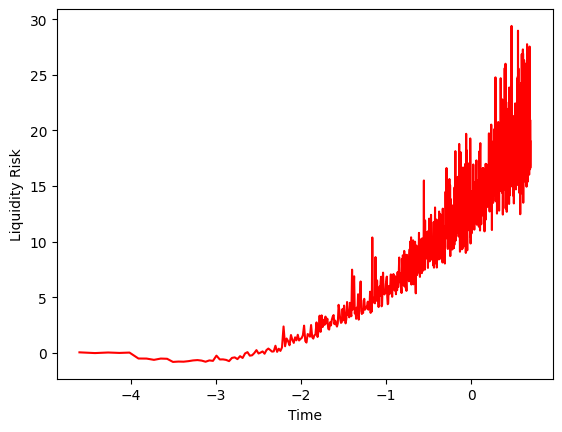

In [3]:
plt.plot(np.log(tau_vals), np.log(liquidity_risks), c='r')
plt.xlabel('Time')
plt.ylabel('Liquidity Risk')